# Сжатие изображения без потери качества при помощи PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy.stats import stats
from sklearn.decomposition import PCA

Загрузим картинку и нарисуем ее в монохромный формат

In [2]:
%%capture
!wget -O flower.png "https://www.dropbox.com/s/xoos0myk285efyu/flower.png?dl=0"

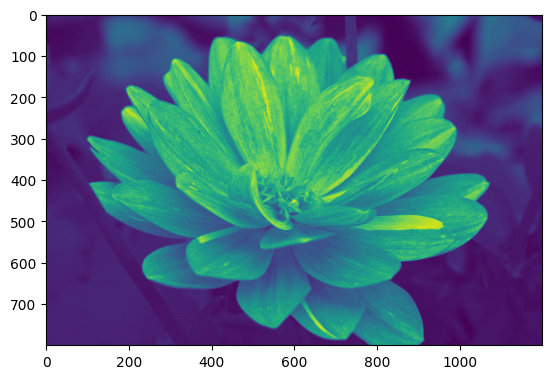

In [3]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

## Вопрос для Quiz

Какого размера картинка img? В ответе запишите общее число пикселей.

In [4]:
# ваш код здесь
img.shape

(800, 1200)

Посмотрим на матрицу изображения

In [5]:
img

array([[16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       [16, 16, 16, ..., 10, 10, 10],
       ...,
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10],
       [19, 19, 19, ..., 10, 10, 10]], dtype=uint8)

### Сейчас будем делать PCA

**Задание.** Масштабируйте данные, поделив значения в матрице на 255

In [7]:
img.dtype

dtype('uint8')

In [8]:
# Ваш код здесь
img/255

array([[0.0627451 , 0.0627451 , 0.0627451 , ..., 0.03921569, 0.03921569,
        0.03921569],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.03921569, 0.03921569,
        0.03921569],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.03921569, 0.03921569,
        0.03921569],
       ...,
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.03921569, 0.03921569,
        0.03921569],
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.03921569, 0.03921569,
        0.03921569],
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.03921569, 0.03921569,
        0.03921569]])

**Задание.** Обучите PCA с 50-ю компонентами. Снизьте размерность.

In [9]:
# Ваш код здесь
pca = PCA(n_components=50)

pca.fit_transform(img)


array([[-1.65848196e+03,  2.49174696e+02, -8.45309420e+02, ...,
         5.92134664e+01, -9.13265637e+00,  5.35697916e+01],
       [-1.65690586e+03,  2.45659649e+02, -8.53020041e+02, ...,
         5.92715230e+01, -1.10817456e+01,  5.38181038e+01],
       [-1.65359801e+03,  2.39388020e+02, -8.62562688e+02, ...,
         5.77514013e+01, -1.19000395e+01,  5.48440257e+01],
       ...,
       [-1.94562338e+03,  5.04010561e+02,  3.81157208e+02, ...,
         2.22052992e+01, -9.34697210e-01,  3.06819622e+00],
       [-1.95557618e+03,  4.86614464e+02,  3.74791474e+02, ...,
         9.26862557e+00,  1.24238679e+01, -1.24860047e+01],
       [-1.96781506e+03,  4.68056749e+02,  3.61933712e+02, ...,
        -2.35085712e+00,  2.14521046e+01, -2.23592018e+01]])

In [10]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

In [11]:
prop_var

array([4.60321311e-01, 1.45549817e-01, 9.59779298e-02, 4.63593079e-02,
       3.77067904e-02, 3.21227797e-02, 2.40573879e-02, 1.83444266e-02,
       1.48169213e-02, 1.35727687e-02, 1.02457044e-02, 9.11858430e-03,
       8.58837141e-03, 7.48180239e-03, 6.31101776e-03, 4.89480445e-03,
       4.48641147e-03, 3.92802037e-03, 3.54012114e-03, 3.14432640e-03,
       2.98864528e-03, 2.46653259e-03, 2.31777180e-03, 1.99333978e-03,
       1.95230994e-03, 1.75565662e-03, 1.70605310e-03, 1.58957450e-03,
       1.52232071e-03, 1.34542398e-03, 1.32035966e-03, 1.17721457e-03,
       1.10666540e-03, 9.89747531e-04, 9.60267709e-04, 9.11181814e-04,
       8.17695886e-04, 7.99527308e-04, 7.72418752e-04, 7.30121295e-04,
       7.15681978e-04, 6.79727289e-04, 6.08969509e-04, 5.85424048e-04,
       5.66950267e-04, 5.55514515e-04, 5.23055251e-04, 5.10140924e-04,
       4.98085697e-04, 4.54713645e-04])

In [12]:
eigenvalues

array([1.05533717e+06, 3.33688941e+05, 2.20039946e+05, 1.06283805e+05,
       8.64469585e+04, 7.36450008e+04, 5.51542041e+04, 4.20566129e+04,
       3.39694195e+04, 3.11170629e+04, 2.34894027e+04, 2.09053560e+04,
       1.96897848e+04, 1.71528537e+04, 1.44687014e+04, 1.12218768e+04,
       1.02855911e+04, 9.00541813e+03, 8.11611655e+03, 7.20871363e+03,
       6.85179757e+03, 5.65479688e+03, 5.31374643e+03, 4.56995040e+03,
       4.47588498e+03, 4.02503563e+03, 3.91131413e+03, 3.64427414e+03,
       3.49008744e+03, 3.08453224e+03, 3.02706954e+03, 2.69889370e+03,
       2.53715198e+03, 2.26910492e+03, 2.20151919e+03, 2.08898439e+03,
       1.87465763e+03, 1.83300417e+03, 1.77085483e+03, 1.67388326e+03,
       1.64077954e+03, 1.55834947e+03, 1.39612949e+03, 1.34214893e+03,
       1.29979576e+03, 1.27357804e+03, 1.19916161e+03, 1.16955410e+03,
       1.14191617e+03, 1.04248097e+03])

## Вопрос для Quiz

Выведите на экран долю дисперсии, объясняемой первыми 50-ю главными компонентами. Ответ округлите до сотых.

In [15]:
# Ваш код здесь
prop_var_sum = np.sum(prop_var)
round(prop_var_sum, 2)


0.99

**Задание.** Нарисуйте график, на котором отобразите долю дисперсии, объясняемой каждой из первых 50-ти компонент.

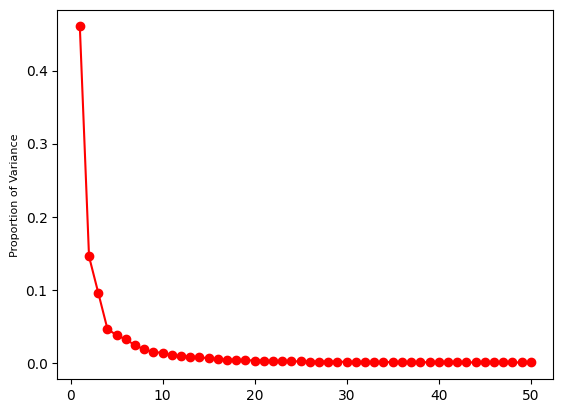

In [16]:
# Ваш код здесь
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

### Восстанавливаем изображение

**Задание.** Восстановите изображение, используя pca.inverse_transform.

In [21]:
img_transformed = pca.fit_transform(img)

In [22]:
# Ваш код здесь
img_reconstructed = pca.inverse_transform(img_transformed)

**Задание.** Нарисуйте рядом два изображения: исходное и восстановленное (по своим 50 компонентам).

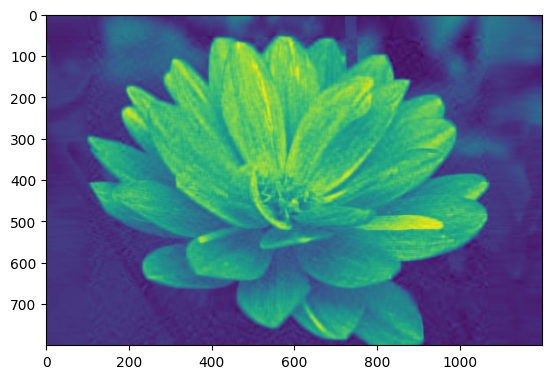

In [25]:
# Ваш код здесь
plt.imshow(img_reconstructed)
plt.show()

## Вопрос для Quiz

Упало ли визуально качество при сжатии изображения до 50 главных компонент?

## Вопрос для Quiz

Подберите минимальное количество компонент, при которых сжатое изображение визуально практически не отличается от исходного. Подбор происходит перебором, ориентируемся на визуальный результат.

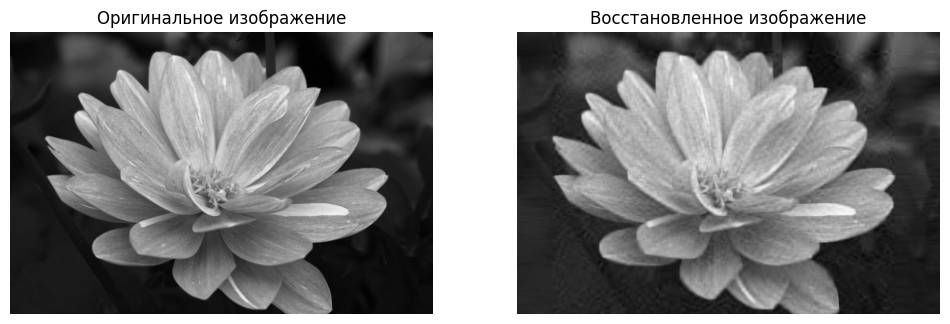

KeyboardInterrupt: Interrupted by user

In [27]:
# Ваш код здесь
# Загрузка изображения
img = cv2.cvtColor(cv2.imread('data/flower.png'), cv2.COLOR_BGR2GRAY)

# Масштабирование изображения
scaled_img = img / 255.0

# Оригинальное количество компонент
original_components = scaled_img.shape[1]

# Перебор количества компонент

# for n_components in range(50, original_components + 1):
# ИЛИ
for n_components in [50, 60, 75, 100]:

    # Обучение PCA с текущим количеством компонент
    pca = PCA(n_components=n_components)
    pca.fit(scaled_img)

    # Сжатие и восстановление изображения
    reduced_img = pca.transform(scaled_img)
    restored_img = pca.inverse_transform(reduced_img)

    # Визуальная оценка оригинального и восстановленного изображения
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.title('Оригинальное изображение')
    plt.imshow(scaled_img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Восстановленное изображение')
    plt.imshow(restored_img, cmap='gray')
    plt.axis('off')

    plt.show()

    # Запрос пользователя о продолжении
    response = input("Продолжить? (y/n): ")
    if response.lower() != 'y':
        break

## Бонус

Попробуйте проделать все действия ноутбука, но уже с цветным изображением.

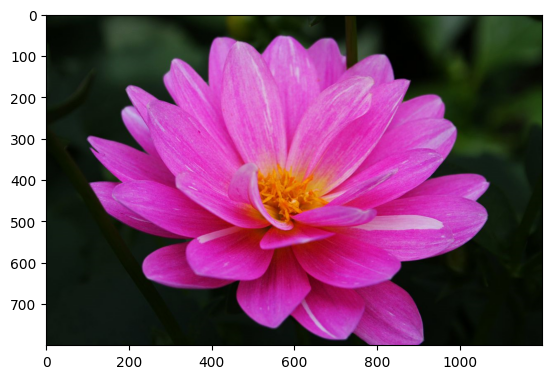

In [28]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Отличия от предыдущих шагов заключаются в том, что цветное RGB-изображение состоит из трех каналов - это матрица яркостей красного, матрица яркостей зеленого и матрица яркостей синего цветов.

Номер канала - последняя размерность в объекте `img`.
Например, матрица яркости красного - это `img[:,:,0]`.

Все действия выше нужно проделать с каждым каналом в отдельности, а потом объединить преобразованные изображения для каждого канала - чтобы получить итоговую картинку со сниженной размерностью.

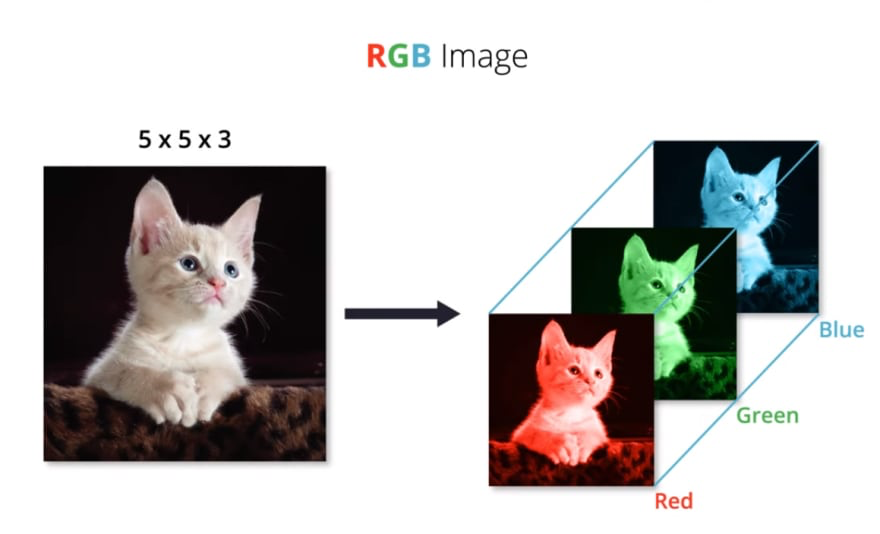

In [ ]:
# ваш код здесь

## Вопрос для Quiz

Найдите любое цветное изображение, которое вам нравится и снизьте его размерность, подберите минимальное число компонент, чтобы визуально не терять качество.

Вы можете снижать размерность для монохромного или для цветного изображения.

Результат - исходное изображение + его размеры, а также изображение после снижения размерности + число компонент.

In [ ]:
# ваш код здесь